# Unsupervised Learning - Clustering

Import CSV Daten

In [17]:
%pip install pandas
%pip install StandardScaler            
%pip install matplotlib 
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# CSV-Datei laden
data = pd.read_csv("data/food.csv", index_col=0)

# Z-Transformation (Standardisierung)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-Means Clustering

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

best_k = 0
best_score = -1

# K-Means für k von 2 bis 5
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score für k={k}: {score}")
    
    if score > best_score:
        best_k = k
        best_score = score

# Finales K-Means-Modell mit dem besten k
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = final_kmeans.fit_predict(scaled_data)
print(f"Bestes k: {best_k} mit Silhouette Score: {best_score}")

Silhouette Score für k=2: 0.3271084145417136
Silhouette Score für k=3: 0.3351693984160507
Silhouette Score für k=4: 0.2798600378321701
Silhouette Score für k=5: 0.21400058012556447
Bestes k: 3 mit Silhouette Score: 0.3351693984160507


Visualisierung mit PCA

In [ ]:
from sklearn.decomposition import PCA

# PCA auf 2 Dimensionen reduzieren
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Scatter-Plot der Cluster
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (k={best_k})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

Hierarchisches Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchisches Clustering mit Ward-Linkage
linked = linkage(scaled_data, method='ward')

# Dendrogramm plotten
plt.figure(figsize=(15, 7))
dendrogram(linked, labels=data.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogramm - Hierarchisches Clustering')
plt.xlabel('Länder')
plt.ylabel('Distanz')
plt.show()

Heatmap

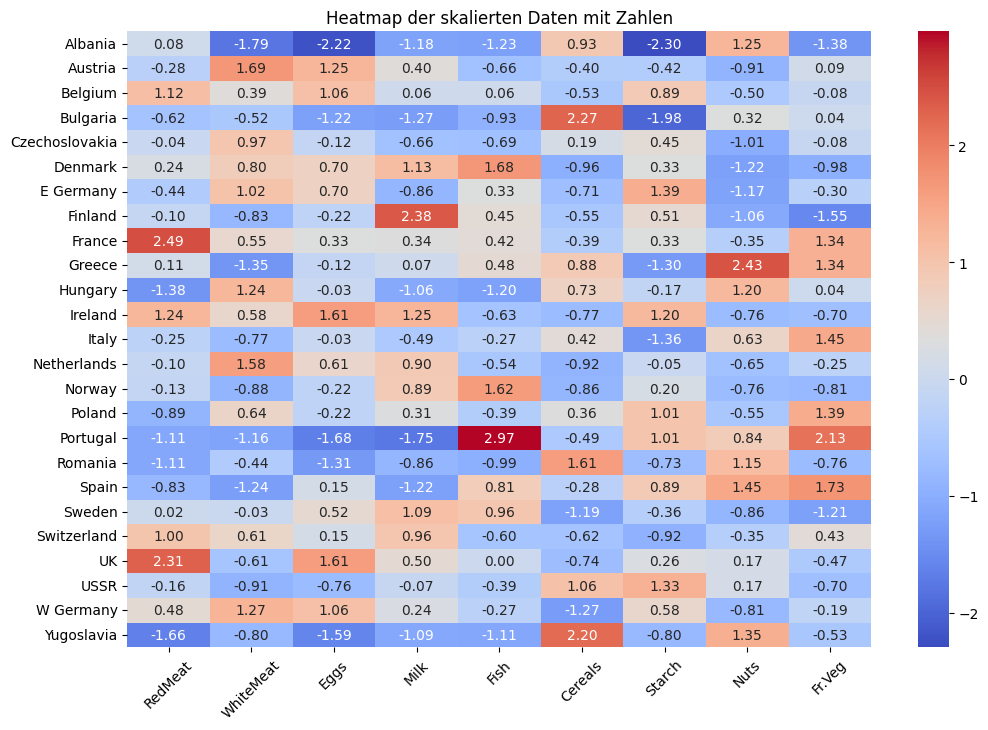

In [22]:
# Z-Transformation der Daten
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Heatmap erstellen mit Zahlen
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("Heatmap der skalierten Daten mit Zahlen")
plt.xticks(rotation=45)
plt.show()

Density-Based Clusterin 

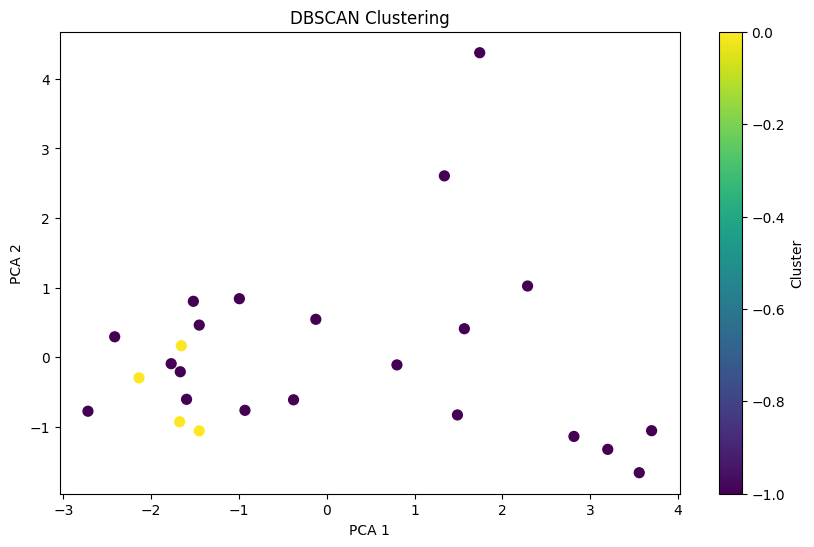

In [23]:
from sklearn.cluster import DBSCAN

# DBSCAN-Modell trainieren
dbscan = DBSCAN(eps=1.5, min_samples=3)  # Parameter können angepasst werden
dbscan_labels = dbscan.fit_predict(scaled_data)

# Scatter-Plot der DBSCAN-Ergebnisse mit PCA-Daten
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()